In [244]:
# Importing the libraries

In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set Warnings

In [246]:
import warnings
warnings.filterwarnings('ignore')

# Loading the datasets

In [247]:
df = pd.read_csv('CarPrice_dataset.csv')

# Exploring the dataset size,columns

## Size of dataset

In [248]:
print("The size of dataset is",df.shape)

The size of dataset is (205, 26)


- So we have 205 rows and 26 columns to works with.lets chech the columns

In [249]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Checking Null values

In [251]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

- So we dont have the null values in the datasets

In [252]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [253]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [254]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [255]:
df['CarName'].head()
# So from here we can sew that company name and model name is mixed.
#So we try to seperate company and model name into different columns

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [256]:
company_name= df['CarName'].apply(lambda x:x.split(" ")[0])
df.insert(3,"Company_Name",company_name)

In [257]:
model_name= df['CarName'].apply(lambda x: x.split(" ")[-1])
df.insert(4,'model_Name',model_name)

#### - So now we dont required column CarName .So we can drop it

In [259]:
df = df.drop(['CarName'],axis = 1)

In [261]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

# Defining the Target And Independent Features

In [262]:
y= df['price']
x= df.drop(['price'],axis =1)

In [264]:
print('The size of Target Variable',y.shape)
print('The mean of Target Variable',y.mean())

The size of Target Variable (205,)
The mean of Target Variable 13276.710570731706


In [265]:
print("The size of independent variables",x.shape)

The size of independent variables (205, 26)


## Seprating the categorical and numerical valuse

In [266]:
num =x.select_dtypes(include= 'number')
char= x.select_dtypes(include= 'object')

In [277]:
num
#So we have 15 numerical columns over here

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3.04,3.0,88.6,168.8,64.1,48.824,2548.0,130.0,3.47,2.68,9.0,111.0,5000,21.0,27.0
1,3.04,3.0,88.6,168.8,64.1,48.824,2548.0,130.0,3.47,2.68,9.0,111.0,5000,21.0,27.0
2,3.04,1.0,94.5,171.2,65.5,52.400,2823.0,152.0,2.91,3.47,9.0,154.0,5000,19.0,26.0
3,4.00,2.0,99.8,176.6,66.2,54.300,2337.0,109.0,3.19,3.40,10.0,102.0,5500,24.0,30.0
4,5.00,2.0,99.4,176.6,66.4,54.300,2824.0,136.0,3.19,3.40,8.0,115.0,5500,18.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201.00,-1.0,109.1,188.8,68.9,55.500,2952.0,141.0,3.78,3.15,9.5,114.0,5400,23.0,28.0
201,202.00,-1.0,109.1,188.8,68.8,55.500,3049.0,141.0,3.78,3.15,8.7,160.0,5300,19.0,25.0
202,202.96,-1.0,109.1,188.8,68.9,55.500,3012.0,173.0,3.58,2.87,8.8,134.0,5500,18.0,23.0
203,202.96,-1.0,109.1,188.8,68.9,55.500,3217.0,145.0,3.01,3.40,23.0,106.0,4800,26.0,27.0


In [278]:
char
# we have total 11 columns of categorical type

,Company_Name,model_Name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,(sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


##  Checking for outlier

In [280]:
num.describe(percentiles = [0.01,0.10,0.20,0.30,.40,.50,.60,.70,.80,.90,.99])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834732,98.747590,174.040917,65.918088,53.723278,2556.547122,126.797463,3.331317,3.253465,10.142537,103.474927,5119.268293,25.191610,30.725659
std,59.270566,1.243977,5.900965,12.213243,2.102825,2.415691,513.768384,40.884682,0.261670,0.304427,3.972040,37.105975,462.232383,6.422415,6.753931
min,3.040000,-1.960000,88.408000,144.816000,62.536000,48.824000,1819.720000,70.000000,2.910000,2.196800,7.000000,52.120000,4150.000000,14.040000,17.040000
1%,3.078400,-1.921600,88.415680,145.023360,62.570560,48.847040,1820.411200,70.000000,2.910000,2.203328,7.000000,52.235200,4150.000000,14.078400,17.078400
10%,21.400000,-1.000000,93.700000,157.300000,63.800000,50.600000,1947.000000,91.000000,2.970000,2.882000,8.000000,68.000000,4500.000000,17.000000,23.000000
20%,41.800000,0.000000,94.500000,165.300000,63.900000,51.400000,2048.000000,97.000000,3.050000,3.070000,8.500000,69.000000,4800.000000,19.000000,24.800000
30%,62.200000,0.000000,95.300000,168.720000,64.400000,52.420000,2242.800000,98.000000,3.150000,3.150000,8.700000,76.000000,4800.000000,21.000000,26.000000
40%,82.600000,0.000000,95.960000,171.500000,65.200000,53.000000,2333.400000,109.000000,3.190000,3.230000,9.000000,87.200000,5000.000000,23.600000,29.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000


### Defining a function for outlier

In [281]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [282]:
num=num.apply(lambda x : outlier_cap(x))

In [283]:
num.describe(percentiles = [0.01,0.10,0.20,0.30,.40,.50,.60,.70,.80,.90,.99])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.835294,98.746916,174.042266,65.918594,53.723615,2556.529140,126.771614,3.331317,3.253561,10.142537,103.476613,5119.268293,25.188238,30.724535
std,59.268662,1.242716,5.898520,12.202030,2.102012,2.415006,513.677387,40.773666,0.261670,0.304094,3.972040,37.103632,462.232383,6.409486,6.747995
min,3.078400,-1.921600,88.415680,145.023360,62.570560,48.847040,1820.411200,70.000000,2.910000,2.203328,7.000000,52.235200,4150.000000,14.078400,17.078400
1%,3.115264,-1.884736,88.423053,145.222426,62.603738,48.869158,1821.074752,70.000000,2.910000,2.209595,7.000000,52.345792,4150.000000,14.115264,17.115264
10%,21.400000,-1.000000,93.700000,157.300000,63.800000,50.600000,1947.000000,91.000000,2.970000,2.882000,8.000000,68.000000,4500.000000,17.000000,23.000000
20%,41.800000,0.000000,94.500000,165.300000,63.900000,51.400000,2048.000000,97.000000,3.050000,3.070000,8.500000,69.000000,4800.000000,19.000000,24.800000
30%,62.200000,0.000000,95.300000,168.720000,64.400000,52.420000,2242.800000,98.000000,3.150000,3.150000,8.700000,76.000000,4800.000000,21.000000,26.000000
40%,82.600000,0.000000,95.960000,171.500000,65.200000,53.000000,2333.400000,109.000000,3.190000,3.230000,9.000000,87.200000,5000.000000,23.600000,29.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000


### Created a function to check unique values in each columns

In [284]:
def count(x):
    x =  x.value_counts().count()
    return(x)

In [285]:
num.apply(lambda x:count(x))

car_ID              201
symboling             6
wheelbase            51
carlength            73
carwidth             40
carheight            47
curbweight          168
enginesize           41
boreratio            35
stroke               35
compressionratio     32
horsepower           56
peakrpm              22
citympg              26
highwaympg           27
dtype: int64

In [286]:
char.apply(lambda x:count(x))

Company_Name       28
model_Name        120
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64

## Visualiztion

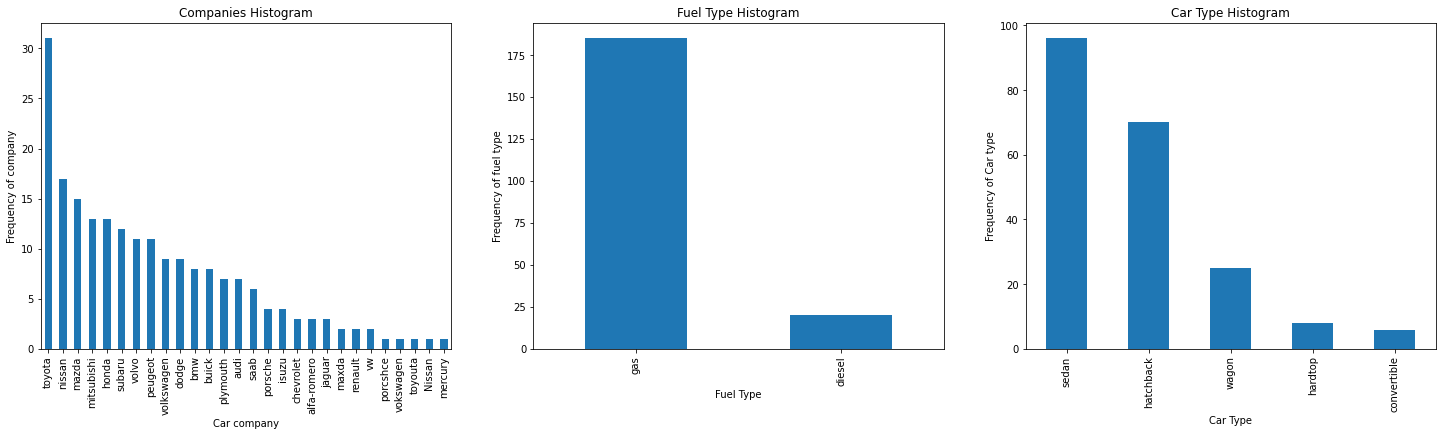

In [288]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = char.Company_Name.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = char.fueltype.value_counts().plot(kind= 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = char.carbody.value_counts().plot(kind= 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

- Toyota has maximum cars
-  Gas typed cars is more than diesel cars
- Seden type car has more in number`

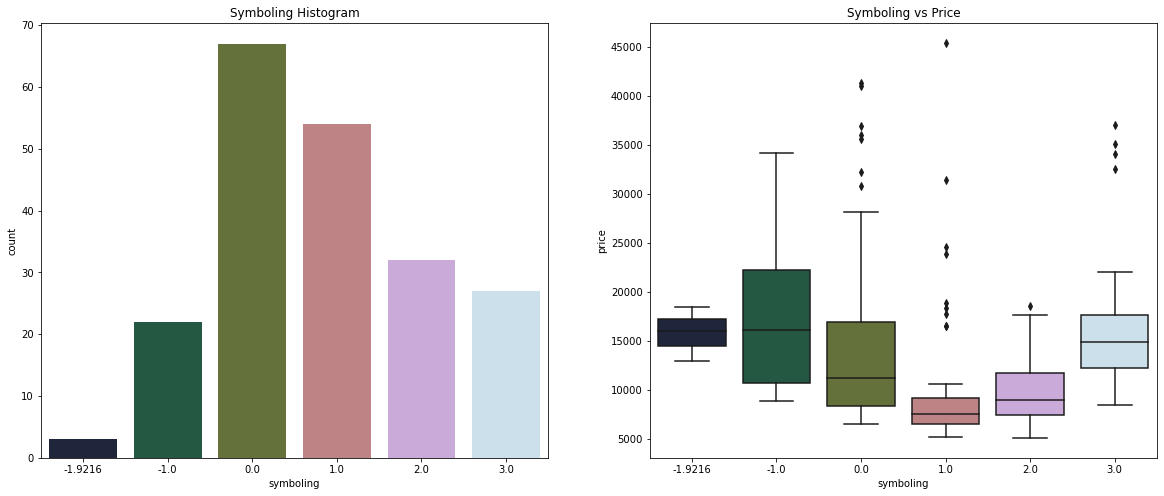

In [355]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(num.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=num.symboling, y=df.price, palette=("cubehelix"))

plt.show()


- It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)

<Figure size 1800x432 with 0 Axes>

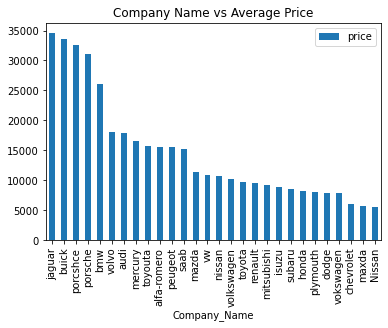

In [356]:
plt.figure(figsize=(25, 6))

df1 = pd.DataFrame(df.groupby(['Company_Name'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()



- `Jaguar and Buick seem to have highest average price.

In [357]:
char.head()

,Company_Name,model_Name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


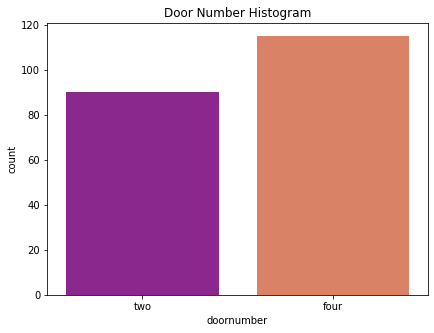

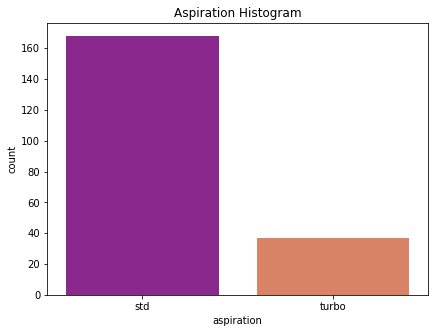

In [358]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(char.doornumber, palette=("plasma"))


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(char.aspiration, palette=("plasma"))


plt.show()

In [359]:
df

,car_ID,symboling,Company_Name,model_Name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,(sw),gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,144ea,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,244dl,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,246,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [370]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [372]:
num_1.iloc[0]

car_ID                 3.07840
symboling              3.00000
wheelbase             88.60000
carlength            168.80000
carwidth              64.10000
carheight             48.84704
curbweight          2548.00000
enginesize           130.00000
boreratio              3.47000
stroke                 2.68000
compressionratio       9.00000
horsepower           111.00000
peakrpm             5000.00000
citympg               21.00000
highwaympg            27.00000
Name: 0, dtype: float64

In [392]:
num

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3.0784,3.0,88.6,168.8,64.1,48.84704,2548.0,130.0,3.47,2.68,9.0,111.0,5000,21.0,27.0
1,3.0784,3.0,88.6,168.8,64.1,48.84704,2548.0,130.0,3.47,2.68,9.0,111.0,5000,21.0,27.0
2,3.0784,1.0,94.5,171.2,65.5,52.40000,2823.0,152.0,2.91,3.47,9.0,154.0,5000,19.0,26.0
3,4.0000,2.0,99.8,176.6,66.2,54.30000,2337.0,109.0,3.19,3.40,10.0,102.0,5500,24.0,30.0
4,5.0000,2.0,99.4,176.6,66.4,54.30000,2824.0,136.0,3.19,3.40,8.0,115.0,5500,18.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201.0000,-1.0,109.1,188.8,68.9,55.50000,2952.0,141.0,3.78,3.15,9.5,114.0,5400,23.0,28.0
201,202.0000,-1.0,109.1,188.8,68.8,55.50000,3049.0,141.0,3.78,3.15,8.7,160.0,5300,19.0,25.0
202,202.9216,-1.0,109.1,188.8,68.9,55.50000,3012.0,173.0,3.58,2.87,8.8,134.0,5500,18.0,23.0
203,202.9216,-1.0,109.1,188.8,68.9,55.50000,3217.0,145.0,3.01,3.40,23.0,106.0,4800,26.0,27.0


In [403]:
char_test= char.drop(['Company_Name','model_Name'],axis= 1)

In [404]:
char_test

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [405]:
char_test.apply(lambda x:count(x))

fueltype          2
aspiration        2
doornumber        2
carbody           5
drivewheel        3
enginelocation    2
enginetype        7
cylindernumber    7
fuelsystem        8
dtype: int64

In [406]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char_test, drop_first = True)
X_char_dum.shape

(205, 29)

In [407]:
X_char_dum

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
201,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
202,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
203,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [416]:
x_all = pd.concat((num,X_char_dum,y),axis =1,join='inner')

In [417]:
x_all

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
0,3.0784,3.0,88.6,168.8,64.1,48.84704,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,1,0,0,13495.0
1,3.0784,3.0,88.6,168.8,64.1,48.84704,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,1,0,0,16500.0
2,3.0784,1.0,94.5,171.2,65.5,52.40000,2823.0,152.0,2.91,3.47,...,0,0,0,0,0,0,1,0,0,16500.0
3,4.0000,2.0,99.8,176.6,66.2,54.30000,2337.0,109.0,3.19,3.40,...,0,0,0,0,0,0,1,0,0,13950.0
4,5.0000,2.0,99.4,176.6,66.4,54.30000,2824.0,136.0,3.19,3.40,...,0,0,0,0,0,0,1,0,0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201.0000,-1.0,109.1,188.8,68.9,55.50000,2952.0,141.0,3.78,3.15,...,0,0,0,0,0,0,1,0,0,16845.0
201,202.0000,-1.0,109.1,188.8,68.8,55.50000,3049.0,141.0,3.78,3.15,...,0,0,0,0,0,0,1,0,0,19045.0
202,202.9216,-1.0,109.1,188.8,68.9,55.50000,3012.0,173.0,3.58,2.87,...,0,0,0,0,0,0,1,0,0,21485.0
203,202.9216,-1.0,109.1,188.8,68.9,55.50000,3217.0,145.0,3.01,3.40,...,0,0,0,0,1,0,0,0,0,22470.0


# Scailing the dataset

In [418]:
from sklearn.preprocessing import StandardScaler

In [419]:
sc = StandardScaler()
x_all1 = pd.DataFrame(sc.fit_transform(x_all),index = x_all.index,columns=x_all.columns)

In [420]:
X = x_all.drop(['price'],axis =1)
Y = x_all['price']

# Training,Testing and Spliting 

In [424]:
from sklearn.model_selection import train_test_split

In [426]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.30,random_state =10)

In [430]:
print('The size of X_train is:',X_train.shape)
print('The size of X_test is:',X_test.shape)
print('The size of Y_train is:',Y_train.shape)
print('The size of Y_test is:',Y_test.shape)

The size of X_train is: (143, 44)
The size of X_test is: (62, 44)
The size of Y_train is: (143,)
The size of Y_test is: (62,)


# Model Building

In [438]:
from sklearn.linear_model import LinearRegression

In [439]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [441]:
ypred = lr.predict(X_test)

In [442]:
ypred

array([ 9209.48037272, 17417.92787583, 14380.44865704, 13646.369252  ,
       43796.75922649, 12351.78951805,  7959.09288336, 12217.71731172,
        5719.39423558, 22906.52595252, 15036.38528733,  9360.75280424,
        8690.87979638, 15888.52330784, 38283.52858178, 18325.80761064,
       11154.33945776, 16531.78523621, 15337.90833298, 13852.5184633 ,
        7850.18073172, 15310.35671886, 11970.89288665, 19750.420681  ,
       20896.88293386, 21612.52591373, 10565.88965881,  8674.04513624,
       10121.31257917, 18346.81689268,  5865.837749  ,  5775.94564549,
        6840.31634578, 17249.07923006, 27609.66522241, 26316.14057718,
       11032.03326537, 18416.46759165,  9748.10508057,  6905.52290823,
        9372.15469721,  8003.47197572,  6240.21894277, 33089.84122784,
       33034.94284774,  6263.11046361, 14440.20596684, 15768.70577447,
        8242.86621887, 13236.43443872,  5779.06674211, 16766.2028506 ,
       20508.90245276,  7775.21262863, 13665.63772419, 24913.95935981,
      

In [443]:
lr.coef_

array([-1.92684722e+01,  4.22324899e+01,  5.42074315e+01, -4.06349979e+01,
        8.20562322e+02,  2.01065450e+02,  3.57984404e+00,  9.21025489e+01,
        9.11851966e+01, -4.48273707e+03, -2.24006882e+02,  3.66853361e+01,
        1.67258173e+00, -3.60451200e+00,  1.26513995e+02, -2.78151279e+03,
        9.95077400e+02, -3.08487537e+02, -3.21880441e+03, -3.51779896e+03,
       -3.05728632e+03, -3.81978118e+03, -2.74206773e+00, -4.77823000e+01,
        7.55189602e+03, -9.09494702e-13, -1.34290500e+03,  3.04320794e+03,
        5.93150469e+02, -4.38693600e+03,  1.76259002e+02, -1.07010979e+04,
       -9.72652497e+03, -6.18463118e+03, -5.73401480e+03, -9.09494702e-13,
        1.76259002e+02,  6.80699697e+02,  1.76259002e+02,  2.78151279e+03,
       -2.70095684e+03,  1.21599321e+03, -7.56433854e+02,  0.00000000e+00])

In [448]:
lr.intercept_

-56600.79973711315

# Checking the accuracy of the model

In [454]:
from sklearn.metrics import r2_score
print('The R2_Score of the model is:',r2_score(Y_test, ypred))

The R2_Score of the model is: 0.8927768748231


In [457]:
y_pred_train = lr.predict(X_train)

In [458]:
r2_score(Y_train, y_pred_train)

0.948289605101418

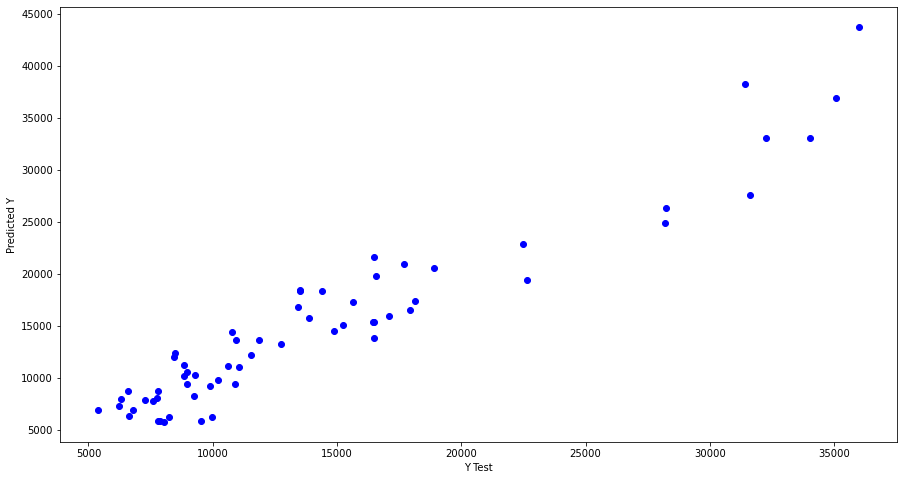

In [491]:
plt.figure(figsize=(15,8))
plt.scatter(Y_test,ypred, c = 'blue')
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

In [492]:
import statsmodels.api as sm
linearReg = sm.OLS(Y_train, X_train)
model1 =linearReg.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     50.19
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           1.16e-51
Time:                        23:44:47   Log-Likelihood:                -1274.9
No. Observations:                 143   AIC:                             2628.
Df Residuals:                     104   BIC:                             2743.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
car_ID                  -19.2685      4.401     -4.378      0.000     -27.996     -10.541
symboling                42.2325    286.887      0.147      0.883    -526.675     611.140
wheelbase                54.2074    121.696      0.445      0.657    -187.120     295.535
carlength               -40.6350     55.310     -0.735      0.464    -150.318      69.048
carwidth                820.5623    324.116      2.532      0.013     177.828    1463.297
carheight               201.0654    145.748      1.380      0.171     -87.958     490.089
curbweight                3.5798      2.056      1.741      0.085      -0.498       7.658
enginesize               92.1025     31.977      2.880      0.005      28.691     155.514
boreratio                91.1852   2474.536      0.037      0.971   -4815.913    4998.283
stroke                -4482.7371   1058.043     -4.237      0.000   -6580.876   -2384.598
compressionratio       -224.0069    618.832     -0.362      0.718   -1451.174    1003.160
horsepower               36.6853     29.655      1.237      0.219     -22.122      95.492
peakrpm                   1.6726      0.817      2.048      0.043       0.053       3.292
citympg                  -3.6045    179.654     -0.020      0.984    -359.866     352.657
highwaympg              126.5140    169.675      0.746      0.458    -209.959     462.987
fueltype_gas          -5.938e+04   1.87e+04     -3.167      0.002   -9.66e+04   -2.22e+04
aspiration_turbo        995.0774   1045.060      0.952      0.343   -1077.316    3067.470
doornumber_two         -308.4875    663.864     -0.465      0.643   -1624.954    1007.979
carbody_hardtop       -3218.8044   1663.919     -1.934      0.056   -6518.418      80.810
carbody_hatchback     -3517.7990   1398.947     -2.515      0.013   -6291.963    -743.635
carbody_sedan         -3057.2863   1502.247     -2.035      0.044   -6036.298     -78.275
carbody_wagon         -3819.7812   1676.982     -2.278      0.025   -7145.300    -494.262
drivewheel_fwd           -2.7421   1250.652     -0.002      0.998   -2482.832    2477.347
drivewheel_rwd          -47.7823   1490.769     -0.032      0.974   -3004.033    2908.469
enginelocation_rear    7551.8960   2993.932      2.522      0.013    1614.816    1.35e+04
enginetype_dohcv       -1.67e-12    3.9e-12     -0.428      0.670   -9.41e-12    6.07e-12
enginetype_l          -1342.9050   1984.526     -0.677      0.500   -5278.294    2592.484
enginetype_ohc         3043.2079   1083.277      2.809      0.006     895.029    5191.387
enginetype_ohcf         593.1505   1924.391      0.308      0.759   -3222.988    4409.289
enginetype_ohcv       -4386.9360   1740.375     -2.521      0.013   -7838.164    -935.708
enginetype_rotor        176.2590   2038.471      0.086      0.931   -3866.105    4218.623
cylindernumber_five    